In [24]:
import pandas as pd
from pycaret.clustering import *
http=pd.read_csv(r"C:\Users\Nidhi Satyapriya\OneDrive\Desktop\ML-Enhanced-WebApp-Firewall\Requests.csv")
http.head(10)

,method,path,body,single_q,double_q,dashes,braces,spaces,badwords,class
0,GET,b'/acunetix-wvs-test-for-some-inexistent-file',b'',0,0,0,0,0,0,0
1,GET,b'/',b'',0,0,0,0,0,0,0
2,GET,b'/',b'',0,0,0,0,0,0,0
3,GET,b'/index.jsp',b'',0,0,0,0,0,0,0
4,GET,b'/index.jsp?content=personal.htm',b'',0,0,0,0,0,0,0
5,GET,b'/feedback.jsp',b'',0,0,0,0,0,0,0
6,GET,b'/index.jsp?content=inside_contact.htm',b'',0,0,0,0,0,0,0
7,GET,b'/index.jsp?content=business.htm',b'',0,0,0,0,0,0,0
8,GET,b'/login.jsp',b'',0,0,0,0,0,0,0
9,GET,b'/index.jsp?content=inside.htm',b'',0,0,0,0,0,0,0


In [25]:
http.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   method    8128 non-null   object
 1   path      8128 non-null   object
 2   body      8128 non-null   object
 3   single_q  8128 non-null   int64 
 4   double_q  8128 non-null   int64 
 5   dashes    8128 non-null   int64 
 6   braces    8128 non-null   int64 
 7   spaces    8128 non-null   int64 
 8   badwords  8128 non-null   int64 
 9   class     8128 non-null   int64 
dtypes: int64(7), object(3)
memory usage: 635.1+ KB


In [26]:
df=http.copy()
df.head(5)

,method,path,body,single_q,double_q,dashes,braces,spaces,badwords,class
0,GET,b'/acunetix-wvs-test-for-some-inexistent-file',b'',0,0,0,0,0,0,0
1,GET,b'/',b'',0,0,0,0,0,0,0
2,GET,b'/',b'',0,0,0,0,0,0,0
3,GET,b'/index.jsp',b'',0,0,0,0,0,0,0
4,GET,b'/index.jsp?content=personal.htm',b'',0,0,0,0,0,0,0


In [27]:
filtered_http = http[~((http['class'] == 0) & (http[['single_q', 'double_q', 'dashes', 'braces', 'spaces', 'badwords']].sum(axis=1) == 0))]
filtered_http.head(10)

,method,path,body,single_q,double_q,dashes,braces,spaces,badwords,class
11,POST,b'/doLogin',b'uid=test2&passw=test2&btnSubmit=Login',0,0,0,0,0,1,0
16,POST,b'/doLogin',b'uid=test2&passw=test2&btnSubmit=Login',0,0,0,0,0,1,0
28,POST,b'/doLogin',b'uid=test2&passw=test2&btnSubmit=Login',0,0,0,0,0,1,0
30,POST,b'/doLogin',b'btnSubmit=Login&passw=g00dPa%24%24w0rD&uid=1',0,0,0,0,0,1,0
57,GET,b'/my%20documents',b'',0,0,0,0,1,0,0
58,GET,b'/my%20documents/JohnSmith/Bank%20Site%20Docu...,b'',0,0,0,0,3,0,0
59,GET,b'/my%20documents/JohnSmith',b'',0,0,0,0,1,0,0
64,GET,b'/my%20documents/JohnSmith/Bank%20Site%20Docu...,b'',0,0,0,0,3,0,0
79,GET,"b""/swagger/index.html?wvstest=javascript:domxs...",b'',1,3,0,2,0,0,0
83,GET,"b""/login.jsp?wvstest=javascript:domxssExecutio...",b'',1,3,0,2,0,0,0


In [28]:
filtered_http.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3731 entries, 11 to 8127
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   method    3731 non-null   object
 1   path      3731 non-null   object
 2   body      3731 non-null   object
 3   single_q  3731 non-null   int64 
 4   double_q  3731 non-null   int64 
 5   dashes    3731 non-null   int64 
 6   braces    3731 non-null   int64 
 7   spaces    3731 non-null   int64 
 8   badwords  3731 non-null   int64 
 9   class     3731 non-null   int64 
dtypes: int64(7), object(3)
memory usage: 320.6+ KB


In [29]:

clus1 = setup(
    data=filtered_http,
    categorical_features=['class'],
    numeric_features=['single_q', 'double_q', 'dashes', 'braces', 'spaces', 'badwords'],
    ignore_features=['method', 'path', 'body'],
        normalize=True ,
        session_id=123
)
print(clus1)

,Description,Value
0,Session id,123
1,Original data shape,"(3731, 10)"
2,Transformed data shape,"(3731, 7)"
3,Ignore features,3
4,Numeric features,6
5,Categorical features,1
6,Preprocess,True
7,Imputation type,simple
8,Numeric imputation,mean
9,Categorical imputation,mode


In [30]:
models()

,Name,Reference
ID,,
kmeans,K-Means Clustering,sklearn.cluster._kmeans.KMeans
ap,Affinity Propagation,sklearn.cluster._affinity_propagation.Affinity...
meanshift,Mean Shift Clustering,sklearn.cluster._mean_shift.MeanShift
sc,Spectral Clustering,sklearn.cluster._spectral.SpectralClustering
hclust,Agglomerative Clustering,sklearn.cluster._agglomerative.AgglomerativeCl...
dbscan,Density-Based Spatial Clustering,sklearn.cluster._dbscan.DBSCAN
optics,OPTICS Clustering,sklearn.cluster._optics.OPTICS
birch,Birch Clustering,sklearn.cluster._birch.Birch


In [31]:
kmeans = create_model('kmeans', num_clusters=2)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3670,1345.1660,1.3383,0,0,0


In [32]:
kmeans

KMeans(n_clusters=2, random_state=123)

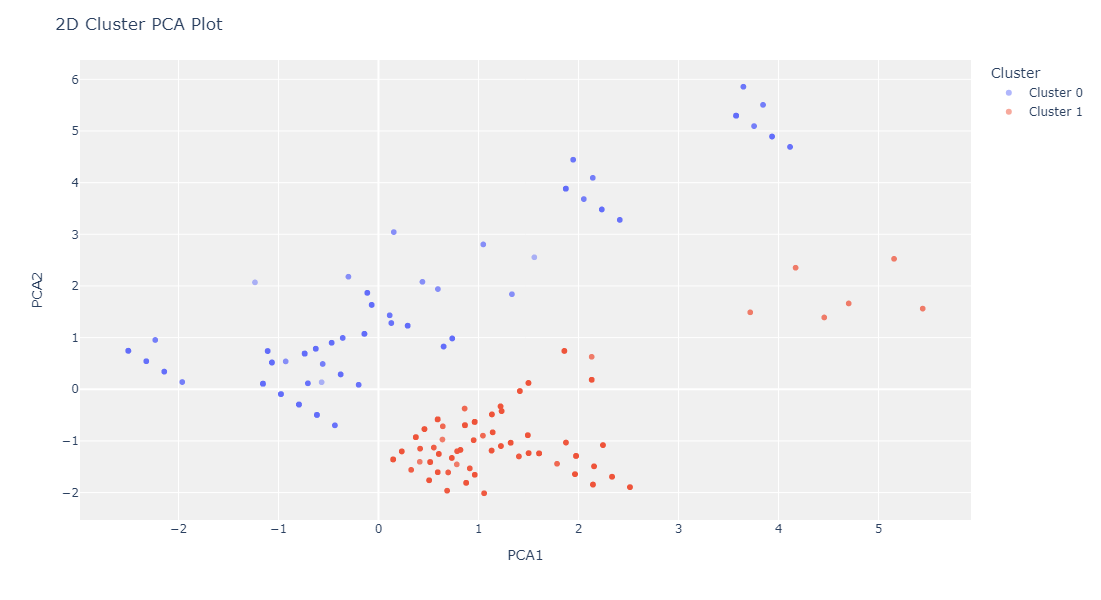

In [33]:
plot_model(kmeans)

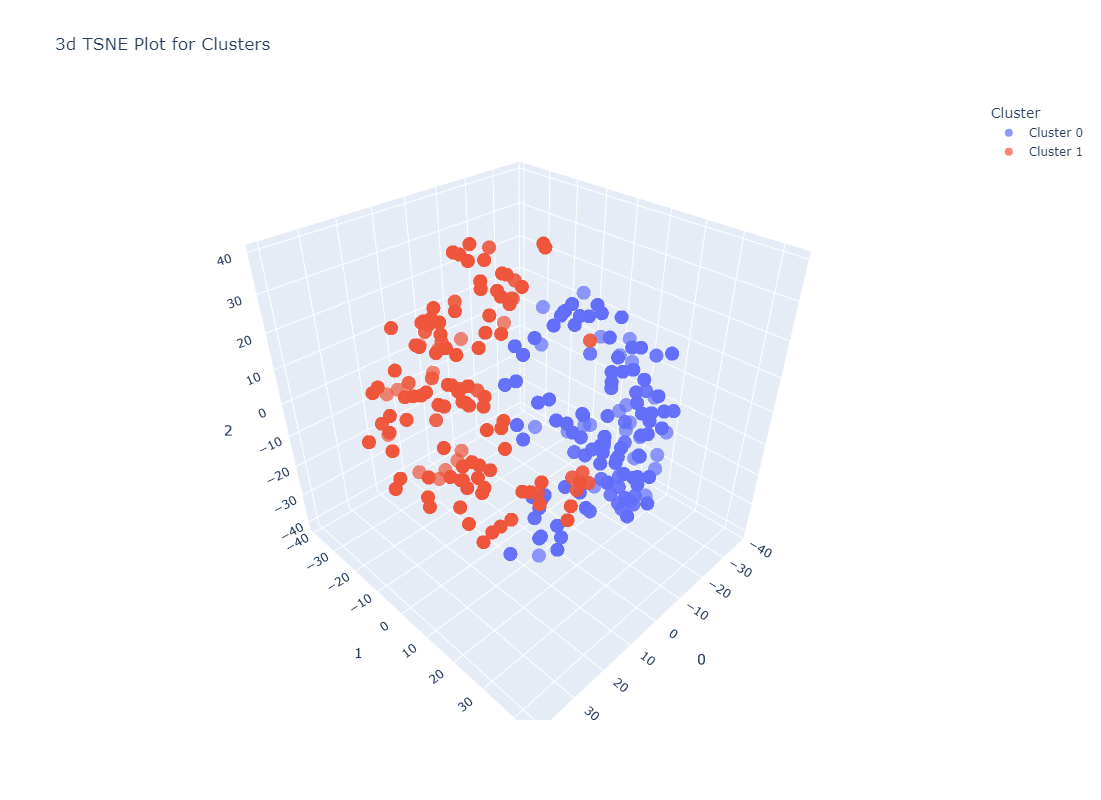

In [35]:
plot_model(kmeans, plot='tsne')

In [38]:
k_means_result=assign_model(kmeans)
k_means_result.to_csv(r"C:\Users\Nidhi Satyapriya\OneDrive\Desktop\k_means.csv")